##### Given a list of short text responses (1000-2000 responses) you are supposed to generate a set of key phrases which can be used to summarize/analyse the set of responses. Good key phrases would be those which can be assigned to multiple responses and which make sense.The key phrases can be generated by encoding and decoding the information in the responses or they can be taken directly from the responses.
##### Example :
##### I really like the show because it is thought provoking and i like shows that make me think The cast. Nothing It is the most complex and original idea I have ever seen or heard of. Also, because it delves into the topic of human emotions, but in an artificial way, if I were to be punny and serious all at once. From what I have seen of the show, I believe that we, as human beings, can compare ourselves to the androids, because we can definitely relate to them. it has many twists and I like that It's unpredictable so you are left wanting more

In [56]:
import string
import re
text = 'I really like the show because it is thought provoking and i like shows that make me think The cast. Nothing It is the most complex and original idea I have ever seen or heard of. Also, because it delves into the topic of human emotions, but in an artificial way, if I were to be punny and serious all at once. From what I have seen of the show, I believe that we, as human beings, can compare ourselves to the androids, because we can definitely relate to them. it has many twists and I like that Its unpredictable so you are left wanting more'
text = text.lower() #making all the words lower case
text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #removing all the punctuation marks
text = re.sub('\w*\d\w*', '', text) #removing all the numbers
print(text)

i really like the show because it is thought provoking and i like shows that make me think the cast nothing it is the most complex and original idea i have ever seen or heard of also because it delves into the topic of human emotions but in an artificial way if i were to be punny and serious all at once from what i have seen of the show i believe that we as human beings can compare ourselves to the androids because we can definitely relate to them it has many twists and i like that its unpredictable so you are left wanting more


In [25]:
#tokenization
#we can also use CountVectorizer for tokenization 
#nltk.tokenize.regexp can also be used
tokens =[t for t in text.split()]
print(tokens)

['i', 'really', 'like', 'the', 'show', 'because', 'it', 'is', 'thought', 'provoking', 'and', 'i', 'like', 'shows', 'that', 'make', 'me', 'think', 'the', 'cast', 'nothing', 'it', 'is', 'the', 'most', 'complex', 'and', 'original', 'idea', 'i', 'have', 'ever', 'seen', 'or', 'heard', 'of', 'also', 'because', 'it', 'delves', 'into', 'the', 'topic', 'of', 'human', 'emotions', 'but', 'in', 'an', 'artificial', 'way', 'if', 'i', 'were', 'to', 'be', 'punny', 'and', 'serious', 'all', 'at', 'once', 'from', 'what', 'i', 'have', 'seen', 'of', 'the', 'show', 'i', 'believe', 'that', 'we', 'as', 'human', 'beings', 'can', 'compare', 'ourselves', 'to', 'the', 'androids', 'because', 'we', 'can', 'definitely', 'relate', 'to', 'them', 'it', 'has', 'many', 'twists', 'and', 'i', 'like', 'that', 'its', 'unpredictable', 'so', 'you', 'are', 'left', 'wanting', 'more']


In [19]:
import nltk
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dohar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [26]:
#removing the stop words
from nltk.corpus import stopwords
clean_token =tokens[:]
stopword = set(stopwords.words('english'))
for token in tokens:
    if token in stopword:
        clean_token.remove(token)

print(clean_token)


['really', 'like', 'show', 'thought', 'provoking', 'like', 'shows', 'make', 'think', 'cast', 'nothing', 'complex', 'original', 'idea', 'ever', 'seen', 'heard', 'also', 'delves', 'topic', 'human', 'emotions', 'artificial', 'way', 'punny', 'serious', 'seen', 'show', 'believe', 'human', 'beings', 'compare', 'androids', 'definitely', 'relate', 'many', 'twists', 'like', 'unpredictable', 'left', 'wanting']


In [77]:
#lemmatizing the text 
from nltk.stem import WordNetLemmatizer 
new_clean_token = []
lemmatizer = WordNetLemmatizer() 
for word in clean_token:
    word = lemmatizer.lemmatize(word)
    new_clean_token.append(word)
print(new_clean_token)

['really', 'like', 'show', 'thought', 'provoking', 'like', 'show', 'make', 'think', 'cast', 'nothing', 'complex', 'original', 'idea', 'ever', 'seen', 'heard', 'also', 'delf', 'topic', 'human', 'emotion', 'artificial', 'way', 'punny', 'serious', 'seen', 'show', 'believe', 'human', 'being', 'compare', 'android', 'definitely', 'relate', 'many', 'twist', 'like', 'unpredictable', 'left', 'wanting']


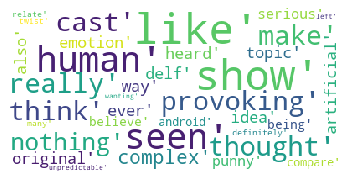

In [66]:
#forming a word cloud for better understanding
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopword,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(new_clean_token))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [115]:
#implementing part of speech tagging
import nltk
postoks = nltk.tag.pos_tag(new_clean_token)
print(postoks)
         

[('really', 'RB'), ('like', 'IN'), ('show', 'NN'), ('thought', 'VBD'), ('provoking', 'VBG'), ('like', 'IN'), ('show', 'NN'), ('make', 'VBP'), ('think', 'VB'), ('cast', 'JJ'), ('nothing', 'NN'), ('complex', 'JJ'), ('original', 'JJ'), ('idea', 'NN'), ('ever', 'RB'), ('seen', 'VBN'), ('heard', 'NN'), ('also', 'RB'), ('delf', 'PRP'), ('topic', 'VBP'), ('human', 'JJ'), ('emotion', 'NN'), ('artificial', 'JJ'), ('way', 'NN'), ('punny', 'VBP'), ('serious', 'JJ'), ('seen', 'VBN'), ('show', 'NN'), ('believe', 'VBP'), ('human', 'JJ'), ('being', 'VBG'), ('compare', 'JJ'), ('android', 'NN'), ('definitely', 'RB'), ('relate', 'VBP'), ('many', 'JJ'), ('twist', 'NN'), ('like', 'IN'), ('unpredictable', 'JJ'), ('left', 'VBD'), ('wanting', 'VBG')]


In [120]:
#going through the most common words
import nltk    
freq = nltk.FreqDist(postoks)
top_words=[]
top_words=freq.most_common()
print(top_words)

[(('like', 'IN'), 3), (('show', 'NN'), 3), (('seen', 'VBN'), 2), (('human', 'JJ'), 2), (('really', 'RB'), 1), (('thought', 'VBD'), 1), (('provoking', 'VBG'), 1), (('make', 'VBP'), 1), (('think', 'VB'), 1), (('cast', 'JJ'), 1), (('nothing', 'NN'), 1), (('complex', 'JJ'), 1), (('original', 'JJ'), 1), (('idea', 'NN'), 1), (('ever', 'RB'), 1), (('heard', 'NN'), 1), (('also', 'RB'), 1), (('delf', 'PRP'), 1), (('topic', 'VBP'), 1), (('emotion', 'NN'), 1), (('artificial', 'JJ'), 1), (('way', 'NN'), 1), (('punny', 'VBP'), 1), (('serious', 'JJ'), 1), (('believe', 'VBP'), 1), (('being', 'VBG'), 1), (('compare', 'JJ'), 1), (('android', 'NN'), 1), (('definitely', 'RB'), 1), (('relate', 'VBP'), 1), (('many', 'JJ'), 1), (('twist', 'NN'), 1), (('unpredictable', 'JJ'), 1), (('left', 'VBD'), 1), (('wanting', 'VBG'), 1)]
